In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/streets-images/t5.jpg
/kaggle/input/streets-images/t4.jpg
/kaggle/input/streets-images/t6.jpg
/kaggle/input/streets-images/t7.jpg
/kaggle/input/streets-images/t3.jpg
/kaggle/input/streets-images/t1.jpg
/kaggle/input/streets-images/t2.jpg


In [2]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -U fastai ddgs primp fasttransform --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 6.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 51.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.19
    Uninstalling fastai-2.7.19:
      Successfully uninstalled fastai-2.7.19


In [3]:
# this function will help us get the url for the images
from ddgs import DDGS  
from fastcore.all import *

def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [4]:
# look at some images
images = 3
urls = search_images('china streets', max_images=images)
for i in range(images):
    print(urls[i])    

https://c8.alamy.com/comp/E1R09C/guangzhou-guangdong-china-at-shangxiajiu-pedestrian-shopping-street-E1R09C.jpg
https://www.easytourchina.com/images/Photo/jinli-old-street/p523_d20160303103619.jpg
https://c8.alamy.com/comp/WA0F2Y/east-nanjing-road-one-of-the-busiest-streets-in-the-city-shanghai-china-WA0F2Y.jpg


In [5]:
import shutil

# Specify the path to the folder you want to delete
folder_path = '/kaggle/working/famous_cities_streets'

# Use a try-except block for safer deletion
try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' and its contents deleted successfully.")
except FileNotFoundError:
    print(f"Folder '{folder_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Folder '/kaggle/working/famous_cities_streets' not found.


In [6]:
# lets define our search space
searches = [
    "Times Square street view", "Shibuya Crossing street view", 
    "Champs-Elysees street view", "Connaught Place Delhi street view", 
    "Piccadilly Circus London street view", "Marina Bay Sands Singapore street view",
    "Piazza del Duomo Milan street view", "Red Square Moscow street view",
    "Fifth Avenue NYC street view", "La Rambla Barcelona street view"
]


path = Path('famous_cities_streets')

In [7]:
from fastdownload import download_url
from fastai.vision.all import *
import time

for pattern in searches:
    folder_name = pattern.replace(" ", "_").replace("-", "_")
    dest = (path/folder_name)
    dest.mkdir(exist_ok=True, parents=True)
    
    print(f"Downloading images for: {pattern}")
    download_images(dest, urls=search_images(pattern, max_images=50))  # ~50 per class
    time.sleep(5)
    
    # Resize to keep them uniform
    resize_images(dest, max_size=400, dest=dest)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [8]:
# unlink failed images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


15

In [9]:
# creating the data block
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 1),
    get_y = parent_label,
    item_tfms = [Resize(224, method = 'squish')]
).dataloaders(path, bs=32)

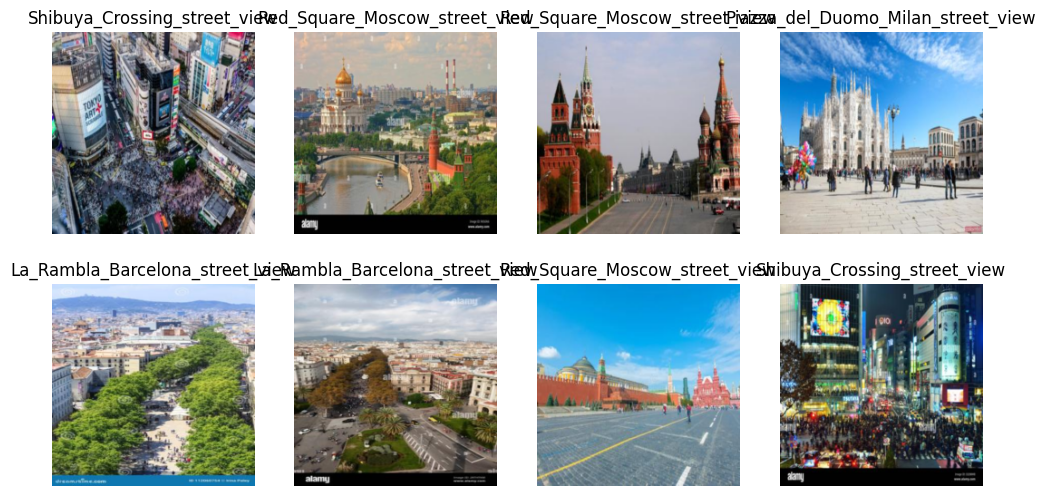

In [10]:
# see some images
dls.show_batch(max_n = 8)

In [11]:
# although the images are not very clean, we can still train the model with them believing it will pickup the key details in them that matters
learn = vision_learner(dls, resnet50, metrics = accuracy)
learn.fine_tune(10)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 180MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,2.663140,0.968715,0.670330,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.689807,0.668211,0.769231,00:04
1,0.465548,0.567655,0.824176,00:04
2,0.349811,0.482684,0.835165,00:04
3,0.269741,0.578703,0.824176,00:04
4,0.209636,0.522121,0.835165,00:04
5,0.170022,0.512660,0.813187,00:04
6,0.136089,0.556533,0.835165,00:04
7,0.113547,0.521973,0.846154,00:04
8,0.094618,0.512727,0.857143,00:04
9,0.079715,0.525569,0.857143,00:04


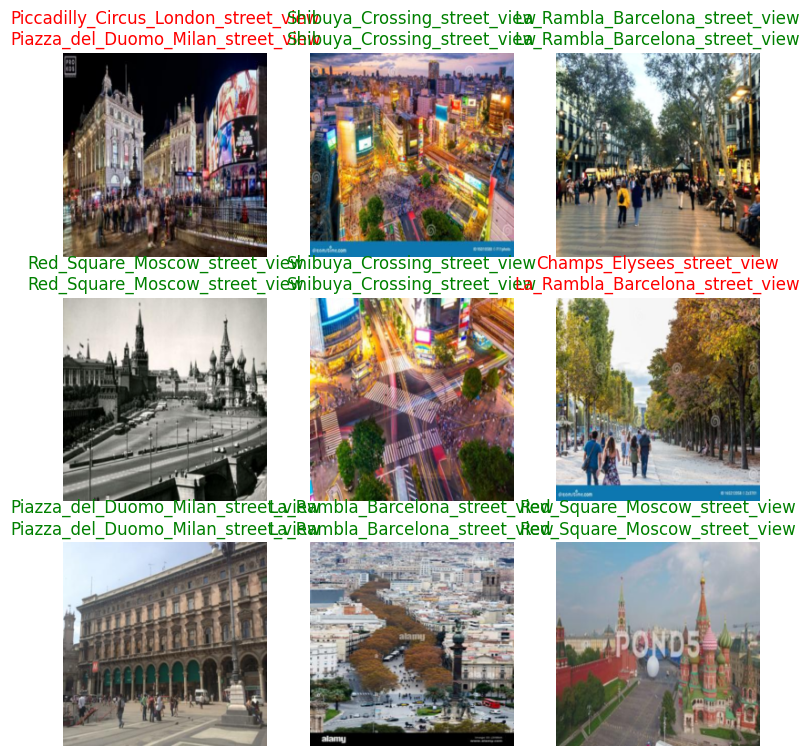

In [12]:
learn.show_results()

In [19]:
import shutil

# Specify the path to the folder you want to delete
folder_path = '/kaggle/input/streets-images'

# Use a try-except block for safer deletion
try:
    shutil.rmtree(folder_path, ignore_errors=True)
    print(f"Folder '{folder_path}' and its contents deleted successfully.")
except FileNotFoundError:
    print(f"Folder '{folder_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")


Folder '/kaggle/input/streets-images' and its contents deleted successfully.


Prediction: Connaught_Place_Delhi_street_view; Confidence: 0.7409


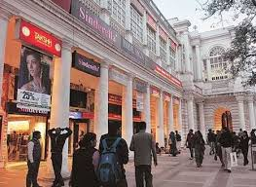

Prediction: Connaught_Place_Delhi_street_view; Confidence: 0.9794


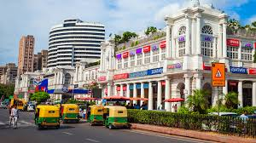

Prediction: Times_Square_street_view; Confidence: 0.6839


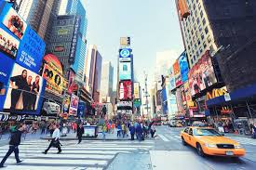

Prediction: Red_Square_Moscow_street_view; Confidence: 0.7076


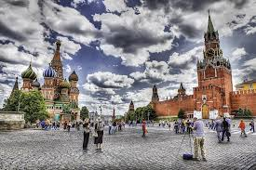

Prediction: Red_Square_Moscow_street_view; Confidence: 0.9999


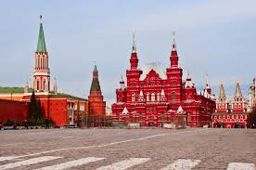

Prediction: Shibuya_Crossing_street_view; Confidence: 0.6141


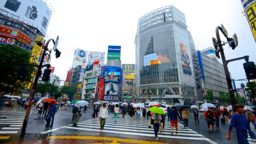

Prediction: Piccadilly_Circus_London_street_view; Confidence: 0.5108


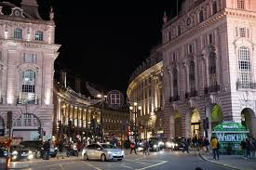

Prediction: Connaught_Place_Delhi_street_view; Confidence: 0.9996


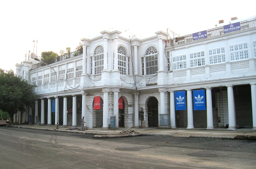

In [23]:
# let's test the model out
for i in range(1, 9):
    test_img = f"/kaggle/input/street-imagesv2/t{i}.jpg"   # replace with your test chart image

    pred, idx, probs = learn.predict(PILImage.create(test_img))

    print(f"Prediction: {pred}; Confidence: {probs[idx]:.4f}")

    # view the image
    img = Image.open(test_img)
    img.thumbnail((256, 256)) # Use thumbnail for resizing in place
    display(img)

In [24]:
# works good on test images
# accuracy near about 85% :)